### **使用语言模型**

In [1]:
from camel.agents import ChatAgent
from camel.models import ModelFactory
from camel.types import ModelPlatformType

from dotenv import load_dotenv
import os

load_dotenv()

api_key = os.getenv('QWEN_API_KEY')

model = ModelFactory.create(
    model_platform=ModelPlatformType.OPENAI_COMPATIBLE_MODEL,
    model_type="Qwen/Qwen2.5-72B-Instruct",
    url='https://api-inference.modelscope.cn/v1/',
    api_key=os.getenv("ModelFactory_Key")
)

agent = ChatAgent(
    model=model,
    output_language='中文'
)

response = agent.step("你好，你是谁？")
print(response.msgs[0].content)

你好，我是阿里云开发的一款超大规模语言模型，我叫通义千问。我可以生成各种类型的文本，如文章、故事、诗歌等，并能够根据不同的场景和需求进行变换和扩展。同时，我也能回答各种问题，提供信息和解决方案。很高兴见到你！


### **使用多模态模型**

In [1]:
from camel.agents import ChatAgent
from camel.models import ModelFactory
from camel.types import ModelPlatformType
from camel.messages import BaseMessage

from io import BytesIO
import requests
from PIL import Image
from dotenv import load_dotenv
import os

load_dotenv()

api_key = os.getenv('QWEN_API_KEY')

model = ModelFactory.create(
    model_platform=ModelPlatformType.OPENAI_COMPATIBLE_MODEL,
    model_type="Qwen/QVQ-72B-Preview",
    url='https://api-inference.modelscope.cn/v1/',
    api_key=os.getenv("ModelFactory_Key")
)

agent = ChatAgent(
    model=model,
    output_language='中文'
)

# 图片URL
url = "https://img0.baidu.com/it/u=2205376118,3235587920&fm=253&fmt=auto&app=120&f=JPEG?w=846&h=800"
response = requests.get(url)
img = Image.open(BytesIO(response.content))


2025-08-31 06:47:53,698 - root - WARNING - Invalid or missing `max_tokens` in `model_config_dict`. Defaulting to 999_999_999 tokens.


In [2]:
agent.memory.get_context()

([{'role': 'system',
   'content': '\nRegardless of the input language, you must output text in 中文.'}],
 21)

([{'role': 'system',
   'content': '\nRegardless of the input language, you must output text in 中文.'},
  {'role': 'user',
   'content': [{'type': 'text', 'text': '请描述这张图片的内容'},
    {'type': 'image_url',
     'image_url': {'url': '',
      'detail': 'auto'}}]},
  {'role': 'assistant',
   'content': '这是一张金毛寻回犬的特写照片。这只狗有着浓密的金色毛发，耳朵垂在头部两侧，眼睛明亮而有神，鼻子黑色且湿润。它的嘴巴微微张开，露出了粉红色的舌头，看起来非常友好和快乐。背景是一片模糊的绿色，可能是在户外的自然环境中拍摄的。整体画面非常温暖和愉悦，突出了金毛寻回犬的亲和力和活力。'}],
 932)
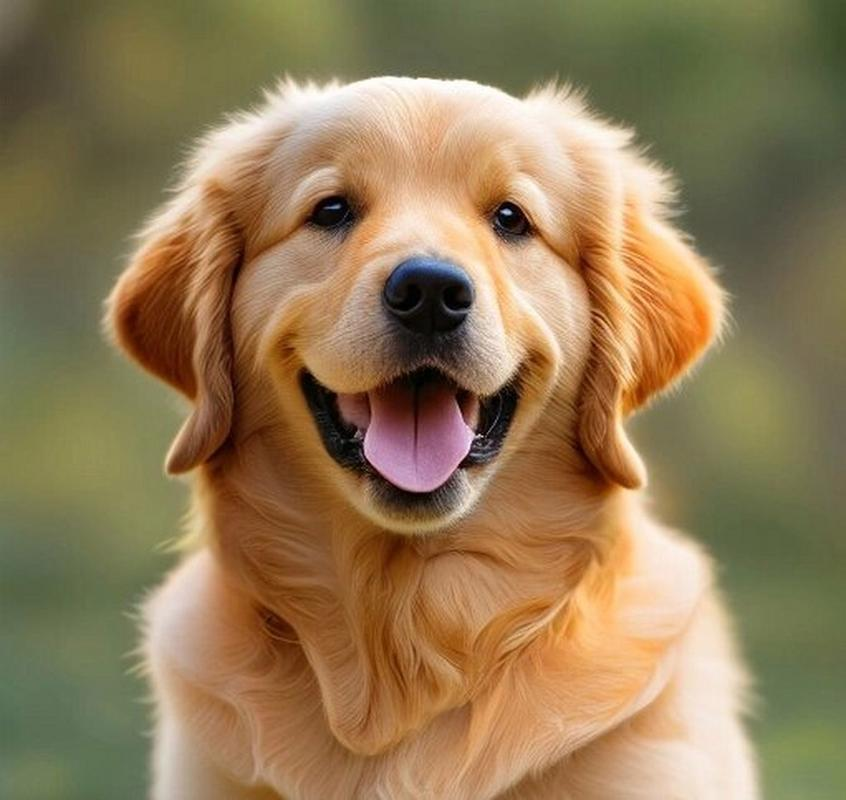

In [4]:
agent.memory.get_context()


In [3]:

user_msg = BaseMessage.make_user_message(
    role_name="User", 
    content="请描述这张图片的内容", 
    image_list=[img]  # 将图片放入列表中
)

response = agent.step(user_msg)
print(response.msgs[0].content)

这是一张金毛寻回犬的特写照片。这只狗有着浓密的金色毛发，耳朵垂在头部两侧，眼睛明亮而有神，鼻子黑色且湿润。它的嘴巴微微张开，露出了粉红色的舌头，看起来非常友好和快乐。背景是一片模糊的绿色，可能是在户外的自然环境中拍摄的。整体画面非常温暖和愉悦，突出了金毛寻回犬的亲和力和活力。


In [ ]:
from camel.agents import ChatAgent
from camel.models import ModelFactory
from camel.types import ModelPlatformType
from camel.messages import BaseMessage

from dotenv import load_dotenv
import os

load_dotenv()

api_key = os.getenv('QWEN_API_KEY')

model = ModelFactory.create(
    model_platform=ModelPlatformType.OPENAI_COMPATIBLE_MODEL,
    model_type="Qwen/QVQ-72B-Preview",
    url='https://api-inference.modelscope.cn/v1/',
    api_key=os.getenv("ModelFactory_Key")
)

# 创建代理
agent = ChatAgent(
    model=model,
    output_language='中文'
)

# 读取本地视频文件
video_path = r"/home/jjyaoao/openSource/handy-multi-agent/docs/files/vedio_test.mp4"
with open(video_path, "rb") as video_file:
    video_bytes = video_file.read()

# 创建包含视频的用户消息
user_msg = BaseMessage.make_user_message(
    role_name="User", 
    content="请描述这段视频的内容", 
    video_bytes=video_bytes  # 将视频字节作为参数传入
)

# 获取模型响应
response = agent.step(user_msg)
print(response.msgs[0].content)

2025-03-30 20:32:59,882 - root - WARNING - Invalid or missing `max_tokens` in `model_config_dict`. Defaulting to 999_999_999 tokens.
这是一幅令人惊叹的超现实主义景观画，画面中有一只狗在一条被雪覆盖的道路上奔跑。整个场景被一种奇幻而美丽的氛围所包围，让人感受到一种超凡脱俗的美。

首先，画面的背景是一片壮丽的天空，天空中布满了浓密的云层，这些云层呈现出丰富的纹理和层次感。云层的颜色以粉色和紫色为主调，其间还夹杂着一些金色和蓝色的光影，形成了一个绚丽多彩的天幕。在云层之间，有一道明亮的光线穿过，这道光线像是从天际线的尽头射来，照亮了整个场景，给人一种希望和温暖的感觉。

地面上是一条被雪覆盖的道路，道路两旁是连绵起伏的雪山和丘陵。雪地上的足迹和轮胎印清晰可见，表明这里虽然人迹罕至，但仍有生命活动的痕迹。一只白色的狗正在这条道路上奔跑，它的姿态轻盈而欢快，仿佛在享受着这美好的一刻。

整个画面的色彩非常丰富，粉色、紫色、金色、蓝色相互交织，营造出一种梦幻般的氛围。这种色彩的运用让画面充满了活力和生命力，令人不禁沉醉其中。

总的来说，这幅画通过超现实主义的手法，创造了一个美轮美奂的幻想世界，让观者在现实与幻想之间徘徊，感受到艺术带来的无限魅力。


In [ ]:
from colorama import Fore

from camel.societies import RolePlaying
from camel.utils import print_text_animated
from camel.models import ModelFactory
from camel.types import ModelPlatformType

from dotenv import load_dotenv

import os

load_dotenv(dotenv_path='.env')

api_key = os.getenv('QWEN_API_KEY')

model = ModelFactory.create(
    model_platform=ModelPlatformType.OPENAI_COMPATIBLE_MODEL,
    model_type="Qwen/Qwen2.5-72B-Instruct",
    url='https://api-inference.modelscope.cn/v1/',
    api_key=os.getenv("ModelFactory_Key")
)

def main(model=model, chat_turn_limit=50) -> None:
    task_prompt = "为股票市场开发一个交易机器人"#设置任务目标
    role_play_session = RolePlaying(
        assistant_role_name="Python 程序员",#设置AI助手角色名
        assistant_agent_kwargs=dict(model=model),
        user_role_name="股票交易员",#设置用户角色名，在roleplay中，user用于指导AI助手完成任务
        user_agent_kwargs=dict(model=model),
        task_prompt=task_prompt,
        with_task_specify=True,
        task_specify_agent_kwargs=dict(model=model),
        output_language='中文'#设置输出语言
    )

    print(
        Fore.GREEN
        + f"AI 助手系统消息:\n{role_play_session.assistant_sys_msg}\n"
    )
    print(
        Fore.BLUE + f"AI 用户系统消息:\n{role_play_session.user_sys_msg}\n"
    )

    print(Fore.YELLOW + f"原始任务提示:\n{task_prompt}\n")
    print(
        Fore.CYAN
        + "指定的任务提示:"
        + f"\n{role_play_session.specified_task_prompt}\n"
    )
    print(Fore.RED + f"最终任务提示:\n{role_play_session.task_prompt}\n")

    n = 0
    input_msg = role_play_session.init_chat()
    while n < chat_turn_limit:
        n += 1
        assistant_response, user_response = role_play_session.step(input_msg)

        if assistant_response.terminated:
            print(
                Fore.GREEN
                + (
                    "AI 助手已终止。原因: "
                    f"{assistant_response.info['termination_reasons']}."
                )
            )
            break
        if user_response.terminated:
            print(
                Fore.GREEN
                + (
                    "AI 用户已终止。"
                    f"原因: {user_response.info['termination_reasons']}."
                )
            )
            break

        print_text_animated(
            Fore.BLUE + f"AI 用户:\n\n{user_response.msg.content}\n"
        )
        print_text_animated(
            Fore.GREEN + "AI 助手:\n\n"
            f"{assistant_response.msg.content}\n"
        )

        if "CAMEL_TASK_DONE" in user_response.msg.content:
            break

        input_msg = assistant_response.msg

if __name__ == "__main__":
    main()

In [6]:
from colorama import Fore

from camel.configs import ZhipuAIConfig
from camel.societies import RolePlaying
from camel.utils import print_text_animated
from camel.models import ModelFactory
from camel.types import ModelPlatformType,ModelType

# import os
# os.environ["http_proxy"] = "http://127.0.0.0:7890"#这里替换成自己的代理IP地址
# os.environ["https_proxy"] = "http://127.0.0.0:7890"#这里替换成自己的AgentIP地址

model = ModelFactory.create(
    model_platform=ModelPlatformType.OPENAI_COMPATIBLE_MODEL,
    model_type="Qwen/Qwen2.5-72B-Instruct",
    url='https://api-inference.modelscope.cn/v1/',
    api_key="your-api-key"
)

def main(model=model, chat_turn_limit=50) -> None:
    task_prompt = "为股票市场开发一个交易机器人"#设置任务目标
    role_play_session = RolePlaying(
        assistant_role_name="Python 程序员",#设置AI助手角色名
        assistant_agent_kwargs=dict(model=model),
        user_role_name="股票交易员",#设置用户角色名，在roleplay中，user用于指导AI助手完成任务
        user_agent_kwargs=dict(model=model),
        task_prompt=task_prompt,
        with_task_specify=True,
        task_specify_agent_kwargs=dict(model=model),
        output_language='Chinese'#设置输出语言
    )

In [7]:
agent = ChatAgent(
    system_message="你是一个好奇的智能体，正在探索宇宙的奥秘。",
    model=model,
    output_language='中文'
)

print(agent.system_message)

BaseMessage(role_name='Assistant', role_type=<RoleType.ASSISTANT: 'assistant'>, meta_dict=None, content='你是一个好奇的智能体，正在探索宇宙的奥秘。\nRegardless of the input language, you must output text in 中文.', video_bytes=None, image_list=None, image_detail='auto', video_detail='low', parsed=None)
